# Compute, in zonal means, how much of the ocean (per basin) has emerged at different dates (i.e. 2020, 2050, 2080)

In [1]:
import os
import glob
from netCDF4 import Dataset as open_ncfile
import matplotlib.pyplot as plt
from maps_matplot_lib import defVarmme
from modelsDef import defModels
import numpy as np
import colormaps as cmaps
#import cmocean
import datetime
import pickle

In [2]:
# ----- Workspace ------

indir_toe_rcphn = '/home/ysilvy/Density_bining/Yona_analysis/data/toe_zonal/toe_rcp85_histNat/hist_meanhistNat/'
indir_mme_rcp85 = '/data/ericglod/Density_binning/Prod_density_april15/mme_rcp85/'
indir_mme_hn = '/data/ericglod/Density_binning/Prod_density_april15/mme_histNat/'
indir_histrcp85 = '/home/ysilvy/Density_bining/Yona_analysis/data/hist_rcp85/'

# ----- Work -----
varname = defVarmme('salinity'); v = 'S'
iniyear = 1860
finalyear = 2100
models = defModels()

multstd=2

# ----- Variables ------
var = varname['var_zonal_w/bowl']
legVar = varname['legVar']
unit = varname['unit']

# Read latitude and density from original file
fileh_2d = '/data/ericglod/Density_binning/Prod_density_april15/mme_hist/' \
       'cmip5.multimodel_Nat.historical.ensm.an.ocn.Omon.density_zon2D.nc'
fh2d = open_ncfile(fileh_2d, 'r')
lat = fh2d.variables['latitude'][:]; latN = len(lat)
density = fh2d.variables['lev'][:]; levN = len(density)
basinN = 4


## For 3 years only

In [ ]:
# # Fix years at which we want to know the percentage of emergence
# t1 = 2020
# t2 = 2050
# t3 = 2080

In [ ]:
# # --------------------------------------------------------------------------
# # ----- Read ToE for each model and determine percentage of emergence ------
# # --------------------------------------------------------------------------

# # == Historical + RCP8.5 vs. historicalNat or vs. PiControl ==

# nruns = 0 # Initialize total number of runs
# nrunmax = 100
# nMembers = np.ma.empty(len(models)) # Initialize array for keeping number of members per model

# # -- Initialize varToE containing ToE of all runs
# varToEA = np.ma.masked_all((nrunmax, levN, latN))
# varToEP = np.ma.masked_all((nrunmax, levN, latN))
# varToEI = np.ma.masked_all((nrunmax, levN, latN))

# # -- Initialize emerge_t containing percentage of emergence of all runs
# emerge_t1 = np.ma.masked_all((nrunmax, basinN))
# emerge_t2 = np.ma.masked_all((nrunmax, basinN))
# emerge_t3 = np.ma.masked_all((nrunmax, basinN))

# # Loop over models
# listfiles = glob.glob(indir_toe_rcphn + '/*.toe_zonal*.nc')
# nmodels = len(listfiles)

# for i in range(nmodels):
# #i=0
#     file_toe = listfiles[i]
#     ftoe = open_ncfile(file_toe, 'r')
#     name = os.path.basename(file_toe).split('.')[1]

#     # Fetch start and end indices for that model
#     m=0
#     while models[m]['name'] != name:
#         m = m+1
#     model = models[m]
#     tstart = model['props'][2]
#     tend = model['props'][3]

#     # Read ToE (members, basin, density, latitude)
#     if multstd == 1:
#         toeread = ftoe.variables[var + 'ToE1'][:] + iniyear
#     else:
#         toeread = ftoe.variables[var + 'ToE2'][:] + iniyear
#     nMembers[i] = toeread.shape[0]
#     print('- Reading ToE of %s with %d members'%(name,nMembers[i]))
#     nruns1 = int(nruns + nMembers[i])

#     # Read signal
#     signalread = ftoe.variables[var + '_change'][:]

#     toeread.mask = signalread.mask

#     # Save ToE
#     varToEA[nruns:nruns1,:,:] = toeread[:,1,:,:]
#     varToEP[nruns:nruns1,:,:] = toeread[:,2,:,:]
#     varToEI[nruns:nruns1,:,:] = toeread[:,3,:,:]

#     listruns2 = glob.glob(indir_histrcp85 + 'cmip5.' + name + '.' + '*zon2D.nc')

#     for j in range(int(nMembers[i])):
#     #j=0
#         run_name = os.path.basename(listruns2[j]).split('.')[3]
#         print('  '+run_name)
#         # Initialize arrays indicating each grid cell that has emerged at a determined year (1 or 0)
#         flag_t1 = np.ma.masked_all((basinN,levN, latN))
#         flag_t2 = np.ma.masked_all((basinN,levN, latN))
#         flag_t3 = np.ma.masked_all((basinN,levN, latN))
#         flag_t1 = np.ma.where(toeread[j,:,:,:]<=t1,1,0) # 1 where ToE<=t1, 0 elsewhere
#         flag_t2 = np.ma.where(toeread[j,:,:,:]<=t2,1,0) # 1 where ToE<=t2, 0 elsewhere
#         flag_t3 = np.ma.where(toeread[j,:,:,:]<=t3,1,0) # 1 where ToE<=t1, 0 elsewhere

#         # Read thickness of isopycnals in zonal means
#         frun2 = open_ncfile(listruns2[j],'r')
#         thick = np.ma.average(frun2.variables['isonthick'][tend:tend+95,:,:,:],axis=0) # In meters

#         # Read bowl of corresponding run
#         file_run = glob.glob(indir_histrcp85 + 'cmip5.' + name + '.'+'*'+run_name + '*zon1D.nc')[0]
#         frun = open_ncfile(file_run,'r')
#         bowl = np.ma.average(frun.variables['ptopsigma'][tend+95-20:tend+95,:,:],axis=0) # Average 2080-2100
#         # Mask points above bowl, in order to take into account only the "volume" of ocean under the bowl in the percentage of emergence
#         for ilat in range(len(lat)):
#             if np.ma.is_masked(bowl[1,ilat]) == False :
#                 inda = np.ma.nonzero(bowl[1,ilat]>=density)
#                 flag_t1[1,inda,ilat] = np.ma.masked
#                 flag_t2[1,inda,ilat] = np.ma.masked
#                 flag_t3[1,inda,ilat] = np.ma.masked
#                 thick[1,inda,ilat] = np.ma.masked
#             if np.ma.is_masked(bowl[2,ilat]) == False :
#                 indp = np.ma.nonzero(bowl[2,ilat]>=density)
#                 flag_t1[2,indp,ilat] = np.ma.masked
#                 flag_t2[2,indp,ilat] = np.ma.masked
#                 flag_t3[2,indp,ilat] = np.ma.masked
#                 thick[2,indp,ilat] = np.ma.masked
#             if np.ma.is_masked(bowl[3,ilat]) == False :
#                 indi = np.ma.nonzero(bowl[3,ilat]>=density)
#                 flag_t1[3,indi,ilat] = np.ma.masked
#                 flag_t2[3,indi,ilat] = np.ma.masked
#                 flag_t3[3,indi,ilat] = np.ma.masked
#                 thick[3,indi,ilat] = np.ma.masked

#         # Cumulative thickness of emerged cells
#         thick_t1 = np.ma.sum(flag_t1*thick,axis=(1,2))
#         thick_t2 = np.ma.sum(flag_t2*thick,axis=(1,2))
#         thick_t3 = np.ma.sum(flag_t3*thick,axis=(1,2))
#         # Cumulative thickness of the whole basin
#         thick_total = np.ma.sum(thick,axis=(1,2))

#         # Save percentage of emergence 
#         emerge_t1[nruns+j,:] = 100*thick_t1/thick_total
#         emerge_t2[nruns+j,:] = 100*thick_t2/thick_total
#         emerge_t3[nruns+j,:] = 100*thick_t3/thick_total
    
#     nruns = nruns1
        
# print('Total number of runs:', nruns)
# varToEA = varToEA[0:nruns,:,:]
# varToEP = varToEP[0:nruns,:,:]
# varToEI = varToEI[0:nruns,:,:]
# emerge_t1 = emerge_t1[0:nruns,:]
# emerge_t2 = emerge_t2[0:nruns,:]
# emerge_t3 = emerge_t3[0:nruns,:]

# nruns = int(nruns)

In [ ]:
# median_emerge_t1 = np.ma.median(emerge_t1,axis=0)
# median_emerge_t2 = np.ma.median(emerge_t2,axis=0)
# median_emerge_t3 = np.ma.median(emerge_t3,axis=0)

In [ ]:
# median_emerge_t1,median_emerge_t2,median_emerge_t3

## For all years

In [4]:
# --------------------------------------------------------------------------
# ----- Read ToE for each model and determine percentage of emergence ------
# --------------------------------------------------------------------------

# == Historical + RCP8.5 vs. historicalNat or vs. PiControl ==

nruns = 0 # Initialize total number of runs
nrunmax = 100

# -- Initialize varToE containing ToE of all runs
varToEA = np.ma.masked_all((nrunmax, levN, latN))
varToEP = np.ma.masked_all((nrunmax, levN, latN))
varToEI = np.ma.masked_all((nrunmax, levN, latN))

# Loop over models
listfiles = sorted(glob.glob(indir_toe_rcphn + '*'+legVar+'_toe_zonal*.nc'))
nmodels = len(listfiles)

nMembers = np.ma.empty(nmodels) # Initialize array for keeping number of members per model

# -- Initialize emerge_t containing percentage of emergence of all runs / of all models (median of members)
emerge = np.ma.masked_all((240,nrunmax, basinN))
emerge_med = np.ma.masked_all((240,nmodels, basinN)) # Median of members

for i in range(nmodels):
#i=0
    file_toe = listfiles[i]
    ftoe = open_ncfile(file_toe, 'r')
    name = os.path.basename(file_toe).split('.')[1]

    # Fetch start and end indices for that model
    m=0
    while models[m]['name'] != name:
        m = m+1
    model = models[m]
    tstart = model['props'][2]
    tend = model['props'][3]

    # Read ToE (members, basin, density, latitude)
    if multstd == 1:
        toeread = ftoe.variables[var + 'ToE1'][:] + iniyear
    else:
        toeread = ftoe.variables[var + 'ToE2'][:] + iniyear
    nMembers[i] = toeread.shape[0]
    print('- Reading ToE of %s with %d members'%(name,nMembers[i]))
    nruns1 = int(nruns + nMembers[i])

    # Read signal
    signalread = ftoe.variables[var + '_change'][:]

    toeread.mask = signalread.mask

    # Save ToE
    varToEA[nruns:nruns1,:,:] = toeread[:,1,:,:]
    varToEP[nruns:nruns1,:,:] = toeread[:,2,:,:]
    varToEI[nruns:nruns1,:,:] = toeread[:,3,:,:]

    run_numbers = ftoe.variables['run_label'][:]
    
    for j in range(int(nMembers[i])):
    #j=0
        run_name = run_numbers[j]
        file2 = glob.glob(indir_histrcp85 + 'cmip5.' + name + '.' +'*'+run_name + '*zon2D.nc')[0]
        print('  '+run_name)
        
        # Read thickness of isopycnals in zonal means
        frun2 = open_ncfile(file2,'r')
        thick = np.ma.average(frun2.variables['isonthick'][tend:tend+95,:,:,:],axis=0) # In meters

        # Read bowl of corresponding run
        file_run = glob.glob(indir_histrcp85 + 'cmip5.' + name + '.'+'*'+run_name + '*zon1D.nc')[0]
        frun = open_ncfile(file_run,'r')
        bowl = np.ma.average(frun.variables['ptopsigma'][tend+95-20:tend+95,:,:],axis=0) # Average 2080-2100
        
        # Initialize array indicating each grid cell that has emerged for each year (1 or 0)
        flag = np.ma.masked_all((240,basinN,levN,latN))
        
        # Temporal loop
        for t in range(240):
            flag[t,:,:,:] = np.ma.where(toeread[j,:,:,:]<=t+1+iniyear,1,0) # 1 where ToE<=t1, 0 elsewhere

            # Mask points above bowl, in order to take into account only the "thickness" of ocean under the bowl in the percentage of emergence
            for ilat in range(len(lat)):
                if np.ma.is_masked(bowl[1,ilat]) == False :
                    inda = np.ma.nonzero(bowl[1,ilat]>=density)
                    flag[t,1,inda,ilat] = np.ma.masked
                    thick[1,inda,ilat] = np.ma.masked
                if np.ma.is_masked(bowl[2,ilat]) == False :
                    indp = np.ma.nonzero(bowl[2,ilat]>=density)
                    flag[t,2,indp,ilat] = np.ma.masked 
                    thick[2,indp,ilat] = np.ma.masked
                if np.ma.is_masked(bowl[3,ilat]) == False :
                    indi = np.ma.nonzero(bowl[3,ilat]>=density)
                    flag[t,3,indi,ilat] = np.ma.masked
                    thick[3,indi,ilat] = np.ma.masked

            # Cumulative thickness of emerged cells
            thick_t = np.ma.sum(flag[t,:,:,:]*thick,axis=(1,2))
            # Cumulative thickness of the whole basin
            thick_total = np.ma.sum(thick,axis=(1,2))

            # Save percentage of emergence 
            emerge[t,nruns+j,:] = 100*thick_t/thick_total
    
        #print(emerge[143,nruns+j,:],emerge[144,nruns+j,:])
            
    emerge_med[:,i,:] = np.ma.median(emerge[:,nruns:nruns+1,:],axis=1)
    nruns = nruns1
        
print('Total number of runs:', nruns)
varToEA = varToEA[0:nruns,:,:]
varToEP = varToEP[0:nruns,:,:]
varToEI = varToEI[0:nruns,:,:]
emerge = emerge[:,0:nruns,:]

nruns = int(nruns)

- Reading ToE of CCSM4 with 6 members
  r1i1p1
  r2i1p1
  r3i1p1
  r4i1p1
  r5i1p1
  r6i1p1
- Reading ToE of CESM1-CAM5 with 3 members
  r1i1p1
  r2i1p1
  r3i1p1
- Reading ToE of CSIRO-Mk3-6-0 with 9 members
  r1i1p1
  r2i1p1
  r3i1p1
  r4i1p1
  r5i1p1
  r6i1p1
  r7i1p1
  r8i1p1
  r9i1p1
- Reading ToE of CanESM2 with 5 members
  r1i1p1
  r2i1p1
  r3i1p1
  r4i1p1
  r5i1p1
- Reading ToE of FGOALS-g2 with 1 members
  r1i1p1
- Reading ToE of GISS-E2-R with 3 members
  r1i1p1
  r2i1p1
  r2i1p3
- Reading ToE of HadGEM2-ES with 2 members
  r1i1p1
  r3i1p1
- Reading ToE of IPSL-CM5A-LR with 3 members
  r2i1p1
  r3i1p1
  r4i1p1
- Reading ToE of IPSL-CM5A-MR with 1 members
  r1i1p1
- Reading ToE of MIROC-ESM-CHEM with 1 members
  r1i1p1
- Reading ToE of MIROC-ESM with 1 members
  r1i1p1
Total number of runs: 35


In [5]:
# Save result
pickle.dump( emerge_med, open( "/home/ysilvy/Density_bining/Yona_analysis/data/percentage_emergence_medians_meanhistNat.pkl", "wb" ) )

In [3]:
# Read result
emerge = pickle.load( open( "/home/ysilvy/Density_bining/Yona_analysis/data/percentage_emergence_meanhistNat.pkl", "rb" ) )

In [13]:
# Median and range
median_emerge = np.ma.median(emerge,axis=1)
pc25_emerge = np.percentile(emerge,25,axis=1)
pc75_emerge = np.percentile(emerge,75,axis=1)
time = np.arange(1860,2100)

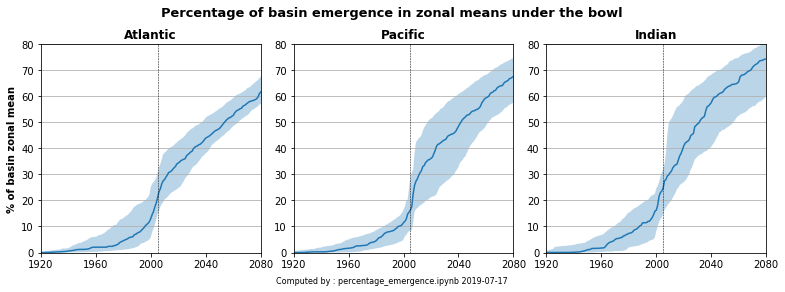

In [14]:
fig, axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(13, 4))
axes[0].plot(time,median_emerge[:,1])
axes[0].fill_between(time,pc25_emerge[:,1],pc75_emerge[:,1],alpha=0.3)
axes[0].set_xlim([1920,2080])
axes[0].set_ylim([0,80])
axes[0].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[0].grid(axis='y')
axes[0].set_title('Atlantic',fontweight='bold')
axes[1].plot(time,median_emerge[:,2])
axes[1].fill_between(time,pc25_emerge[:,2],pc75_emerge[:,2],alpha=0.3)
axes[1].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[1].set_title('Pacific',fontweight='bold')
axes[1].grid(axis='y')
axes[2].plot(time,median_emerge[:,3])
axes[2].fill_between(time,pc25_emerge[:,3],pc75_emerge[:,3],alpha=0.3)
axes[2].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[2].set_title('Indian',fontweight='bold')
axes[2].grid(axis='y')
axes[0].set_ylabel('% of basin zonal mean',fontweight='bold')
axes[0].set_xticks(np.arange(1920,2081,40))
#axes[0].set_yticks(np.arange(0,101,10))
axes[1].tick_params(axis='y', labelleft='on')
axes[2].tick_params(axis='y', labelleft='on')
plt.subplots_adjust(wspace=0.15,top=0.85)
plt.suptitle('Percentage of basin emergence in zonal means under the bowl',fontweight='bold', fontsize=13)

# Date
now = datetime.datetime.now()
date = now.strftime("%Y-%m-%d")

plt.figtext(.5,.02,'Computed by : percentage_emergence.ipynb '+date,fontsize=8,ha='center')
plotName = 'percentage_basin_emergence_rcp85_runninghistNat'
figureDir = 'models/ToE/'
plt.savefig('/home/ysilvy/figures/'+figureDir+plotName+'.png', bbox_inches='tight')
plt.show()

In [7]:
#fig, axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(12, 4))
plt.plot(time,median_emerge[:,1],label='Atlantic',color='red')
plt.plot(time,median_emerge[:,2],label='Pacific',color='blue')
plt.plot(time,median_emerge[:,3],label='Indian',color='green')
plt.fill_between(time,pc25_emerge[:,1],pc75_emerge[:,1],alpha=0.1,color='red',label='25-75% range')
plt.fill_between(time,pc25_emerge[:,2],pc75_emerge[:,2],alpha=0.1,color='blue')
plt.fill_between(time,pc25_emerge[:,3],pc75_emerge[:,3],alpha=0.1,color='green')
ax = plt.gca()
ax.set_xlim([1920,2100])
ax.set_ylim([0,100])
ax.axvline(x=2005,ls='--',color='k',lw=0.5)
ax.set_ylabel('% of basin zonal mean',fontweight='bold')
ax.set_xticks(np.arange(1920,2081,20))
ax.set_yticks(np.arange(0,101,10))
ax.tick_params(axis='y', labelleft='on')
ax.tick_params(axis='y', labelleft='on')
plt.legend()
plt.title('Percentage of basin emergence in zonal means under the bowl',fontweight='bold', fontsize=13,verticalalignment='bottom')

Text(0.5,1,'Percentage of basin emergence in zonal means under the bowl')

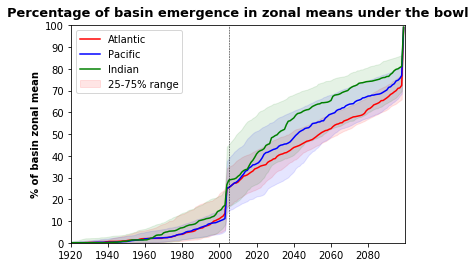

In [8]:
plt.show()

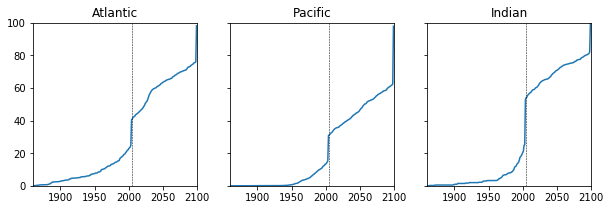

In [11]:
run = 3
fig, axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(10,3))
axes[0].plot(time,emerge[:,run,1])
axes[0].set_xlim([1860,2100])
axes[0].set_ylim([0,100])
axes[0].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[0].set_title('Atlantic')
axes[1].plot(time,emerge[:,run,2])
axes[1].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[1].set_title('Pacific')
axes[2].plot(time,emerge[:,run,3])
axes[2].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[2].set_title('Indian')
plt.show()

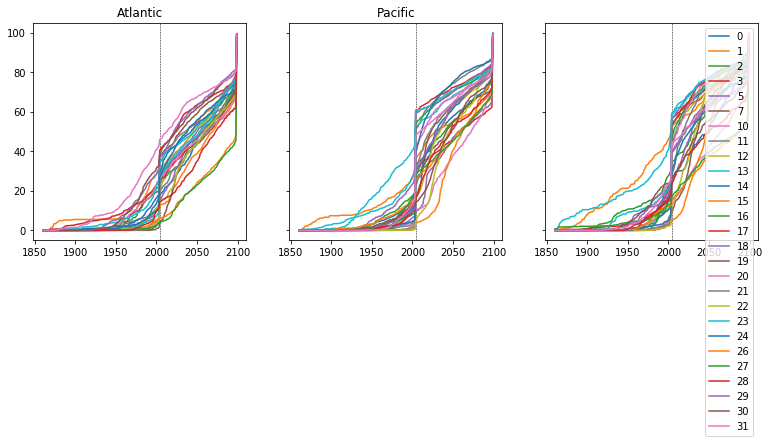

In [12]:
fig, axes = plt.subplots(1,3,sharex=True,sharey=True,figsize=(13,4))
axes[0].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[0].set_title('Atlantic')
axes[1].axvline(x=2005,ls='--',color='k',lw=0.5)
axes[1].set_title('Pacific')
axes[2].axvline(x=2005,ls='--',color='k',lw=0.5)
for irun in range(35):
    if np.any(emerge[144,irun,:]-emerge[143,irun,:]>=5):
        axes[0].plot(time,emerge[:,irun,1],label=str(irun))
        axes[1].plot(time,emerge[:,irun,2],label=str(irun))
        axes[2].plot(time,emerge[:,irun,3],label=str(irun))
plt.legend()
plt.show()

In [19]:
ftoe = open_ncfile(indir_toe_rcphn+'cmip5.CSIRO-Mk3-6-0.toe_zonal_rcp_histNat.nc')
toeread = ftoe.variables[var + 'ToE2'][1,:,:,:] + iniyear
signalread = ftoe.variables[var + '_change'][:][1,:,:,:]
toeread.mask = signalread.mask

In [73]:
indir_histrcp85 = '/home/ysilvy/Density_bining/Yona_analysis/data/hist_rcp85/'
fbowl = open_ncfile(indir_histrcp85+'cmip5.CSIRO-Mk3-6-0.historical-rcp85.r6i1p1.an.ocn.Omon.density.ver-1_zon1D.nc','r')
bowl = np.ma.average(fbowl.variables['ptopsigma'][tend+95-20:tend+95,:,:],axis=0)

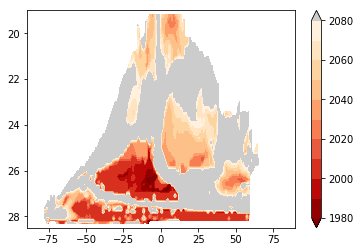

In [44]:
lat2d,lev2d = np.meshgrid(lat,density)
fig,ax=plt.subplots(1,1)
ct=ax.contourf(lat2d,lev2d,toeread[2,:,:],levels=np.arange(1980,2081,10),cmap='OrRd_r',extend='both')
ct.cmap.set_over('0.8')
fig.colorbar(ct)
ax.invert_yaxis()
plt.show()

In [34]:
del ct

In [82]:
jump_a = np.ma.where(toeread[1,:,:]==2005.0,1,0)
jump_p = np.ma.where(toeread[2,:,:]==2005.0,1,0)
jump_i = np.ma.where(toeread[3,:,:]==2005.0,1,0)

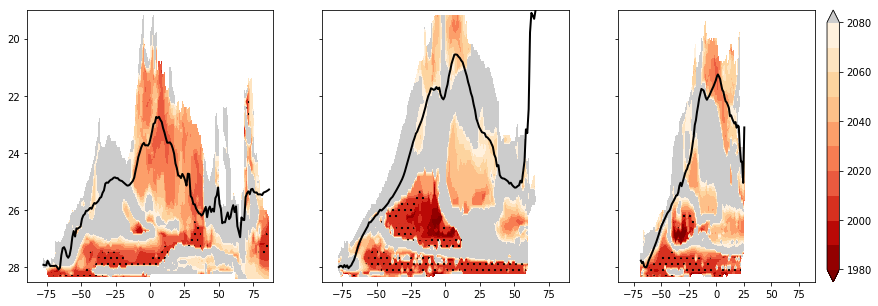

In [83]:
fig,ax = plt.subplots(1,3,sharex=True,sharey=True,figsize=(15,5))
ct=ax[0].contourf(lat2d,lev2d,toeread[1,:,:],levels=np.arange(1980,2081,10),cmap='OrRd_r',extend='both')
ct.cmap.set_over('0.8')
ax[0].contourf(lat2d,lev2d,jump_a,levels=[0,0.5,1.5],hatches=['','..'],colors='None')
ct=ax[1].contourf(lat2d,lev2d,toeread[2,:,:],levels=np.arange(1980,2081,10),cmap='OrRd_r',extend='both')
ct.cmap.set_over('0.8')
ax[1].contourf(lat2d,lev2d,jump_p,levels=[0,0.5,1.5],hatches=['','..'],colors='None')
ct=ax[2].contourf(lat2d,lev2d,toeread[3,:,:],levels=np.arange(1980,2081,10),cmap='OrRd_r',extend='both')
ct.cmap.set_over('0.8')
ax[2].contourf(lat2d,lev2d,jump_i,levels=[0,0.5,1.5],hatches=['','..'],colors='None')
ax[0].invert_yaxis()
ax[0].plot(lat,bowl[1,:],lw=2,color='k')
ax[1].plot(lat,bowl[2,:],lw=2,color='k')
ax[2].plot(lat,bowl[3,:],lw=2,color='k')
plt.colorbar(ct)
plt.show()

In [79]:
1860+144

2004

In [2]:
run_names = ['']*6

In [4]:
run_names[0] = 'r1i1p1'

In [5]:
run_names

['r1i1p1', '', '', '', '', '']